In [73]:
from sklearn.datasets import load_iris
from scipy.special import log_softmax
import math
import numpy
from dataclasses import dataclass
import random
import matplotlib.pyplot as plt
from statistics import mean
import pandas

from funcs import acceptance_prob
from config import DIABETES_CSV_PATH


In [74]:
# Load diabetes dataset

diabetes_dataframe = pandas.read_csv(DIABETES_CSV_PATH)

data = diabetes_dataframe[diabetes_dataframe.columns[:-1]].to_numpy()

targets = diabetes_dataframe[diabetes_dataframe.columns[-1:]].to_numpy().flatten()

In [75]:
# Load iris dataset

# data: "numpy.ndarray" = load_iris()["data"]

# targets: "numpy.ndarray" = load_iris()["target"]

In [76]:
# Normalise data
data_mu = data.mean(axis=0)
data_vu = data.var(axis=0)
data = (data - data_mu) / numpy.sqrt(data_vu)

# Add constant column
data = numpy.c_[numpy.ones(data.shape[0]), data]

In [77]:
# Create values
classes = numpy.unique(targets).__len__()
features = data.shape[1]

# Create prior weights mean
previous_weights: "numpy.ndarray" = numpy.random.normal(size=(classes, features))

# Weights precision
precision_parameter: "float" = 1.0
scale_parameter: "float" = 0.1

# Create list for accepted weights
accepted_list = list()

In [78]:
for _ in range(5000):

    # Create new weights
    new_weights: "numpy.ndarray" = numpy.random.normal(loc=previous_weights, scale=scale_parameter)

    # Create acceptance probability
    acceptance_probability: "float" = acceptance_prob(
        previous_weights=previous_weights,
        new_weights=new_weights,
        precision=precision_parameter,
        data=data,
        targets=targets
    )

    # Determine whether to accept
    rand_index = random.choices(population=[0,1], weights=[acceptance_probability, 1-acceptance_probability])[0]

    # Set new weights
    previous_weights = [new_weights, previous_weights][rand_index]

    # Find model accuracy with new weights
    accuracy = numpy.equal(previous_weights.dot(data.T).argmax(axis=0), targets).mean()

    # Add weights to accepted list
    if not rand_index:
        accepted_list.append(previous_weights)

    # Print epoch data
    if not (_ % 100):
        print(f"Accepted {len(accepted_list)} out of {_ + 1} :: Prob {acceptance_probability:.4f} :: Accuracy {(100 * accuracy):.2f}%")


Accepted 1 out of 1 :: Prob 1.0000 :: Accuracy 61.72%
Accepted 52 out of 101 :: Prob 1.0000 :: Accuracy 77.34%
Accepted 63 out of 201 :: Prob 0.0054 :: Accuracy 77.21%
Accepted 65 out of 301 :: Prob 0.0000 :: Accuracy 77.34%
Accepted 72 out of 401 :: Prob 0.0129 :: Accuracy 77.86%
Accepted 78 out of 501 :: Prob 0.2643 :: Accuracy 77.86%
Accepted 84 out of 601 :: Prob 0.0000 :: Accuracy 76.17%
Accepted 93 out of 701 :: Prob 0.0000 :: Accuracy 77.21%
Accepted 96 out of 801 :: Prob 0.0000 :: Accuracy 77.86%
Accepted 101 out of 901 :: Prob 0.0024 :: Accuracy 77.60%
Accepted 108 out of 1001 :: Prob 0.0001 :: Accuracy 77.34%
Accepted 114 out of 1101 :: Prob 0.0000 :: Accuracy 77.99%
Accepted 119 out of 1201 :: Prob 0.0000 :: Accuracy 77.47%
Accepted 120 out of 1301 :: Prob 0.0828 :: Accuracy 77.47%
Accepted 122 out of 1401 :: Prob 0.0001 :: Accuracy 76.82%
Accepted 129 out of 1501 :: Prob 0.0631 :: Accuracy 77.99%
Accepted 137 out of 1601 :: Prob 0.0000 :: Accuracy 76.82%
Accepted 142 out of

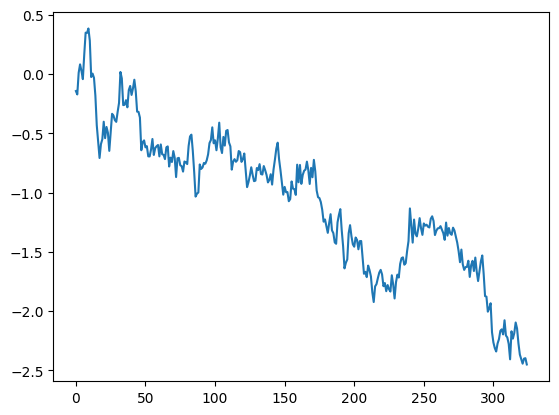

In [93]:
# See weight parameter sample progression

x_data = list(range(len(accepted_list)))

y1_data = numpy.array(accepted_list)[:,1,8].tolist()

fig, ax = plt.subplots()

ax.plot(x_data, y1_data)

plt.show()